# 

Issue: A measure of uncertainty is provided, but it is not clear whether this uncertainty is due to sample variability, or is an uncertainty around the estimator.

Implication: Erronoeus attribution of uncertainty to sample variability or vice versa can bias the downstream analysis. This is particularly true when the underlying data are not shared.

Illustration: We illustrate this issue using simulated data from a gamma distribution D. We first simulate some data, get the observed mean and sd, and the uncertainty around these estimates. We then compare the observed data with that simulated with the erroneous interpretation of the uncertainty.

In [ ]:
library(epitrix)
library(ggplot2)
library(purrr)

### Setting up the data simulation
set.seed(1)
mean_delay <- 5
sd_delay <- 3
params_gamma <- gamma_mucv2shapescale(mu = mean_delay, cv = sd_delay / mean_delay)
sample_size <- list(small = 20, large = 100)
samples <- map(
  sample_size, ~rgamma(.x, shape = params_gamma$shape, scale = params_gamma$scale)
)

obs_mu <- map_dbl(samples, mean)
obs_sd <- map_dbl(samples, sd)

## Bootstrap to find the distribution of the mean and sd
n_boot <- 100
boot_samples <- map(samples, ~ replicate(n_boot, sample(.x, replace = TRUE)))
## Each element of this list is a matrix with 1000 rows and 10000 columns
## That is, each row is a bootstrap sample of the original data
boot_means <- map(boot_samples, colMeans)
boot_sds <- map(boot_samples, ~ apply(.x, 2, sd))
## Precision of estimates; 
precision_mu <- map(boot_means, sd)
precision_sd <- map(boot_sds, sd)

## Treat precision_mu as sample SD; assume large sample size in downstream analysis
## probably be large.
wrong_sample <- map2(
 obs_mu, precision_mu, function(x, y) {
    params <- gamma_mucv2shapescale(mu = x, cv = y / x)
    rgamma(1000, shape = params$shape, scale = params$scale)
 }
)


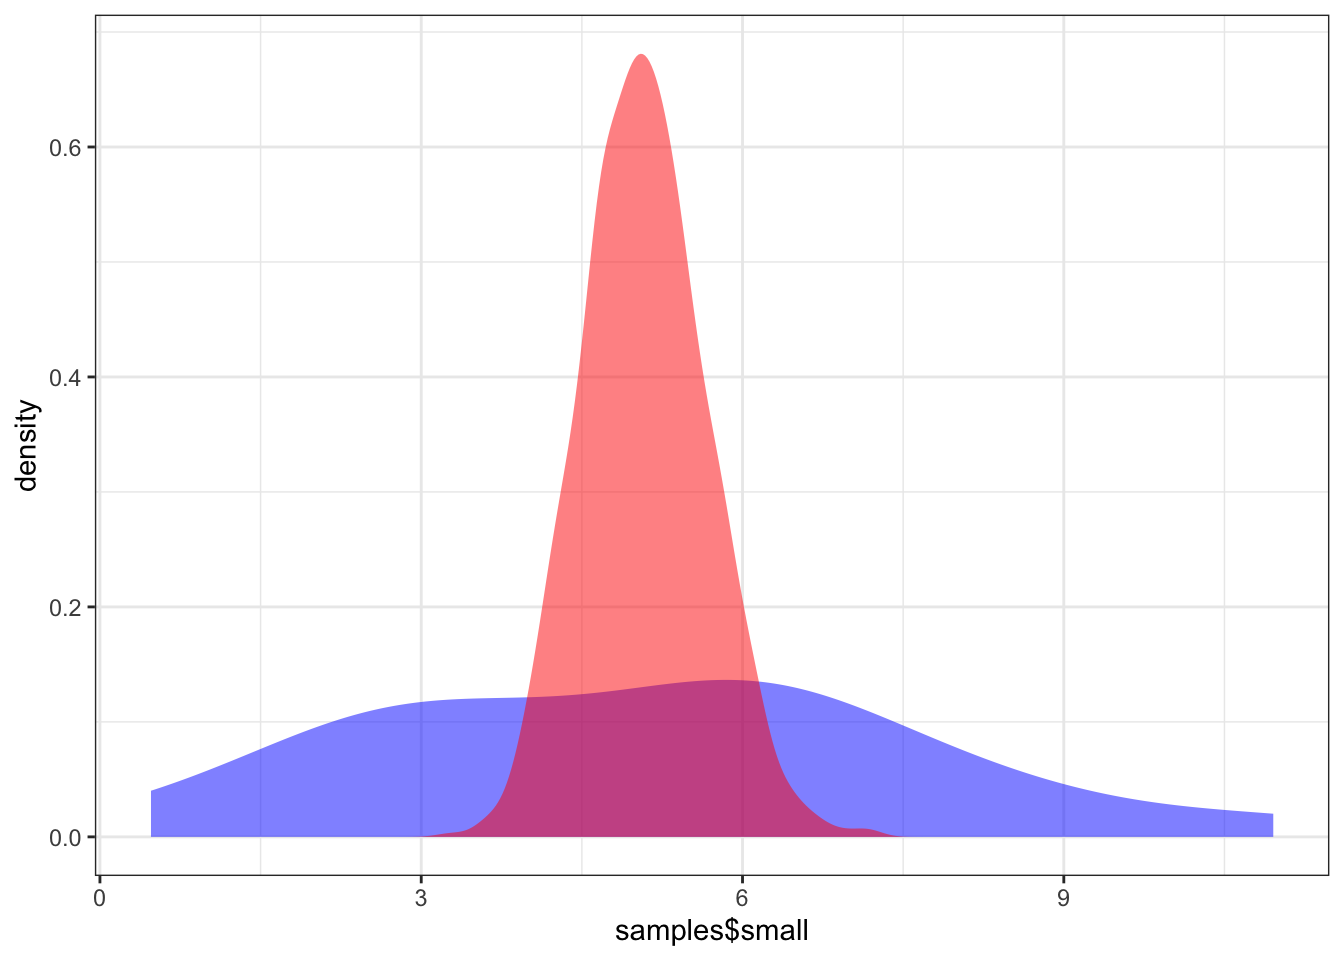

In [ ]:
ggplot() + 
  geom_density(aes(x = samples$small), fill = "blue", alpha = 0.5, col = NA) +
geom_density(aes(x = wrong_sample$small), fill = "red", alpha = 0.5, col = NA) +
  theme_bw()
